<a href="https://colab.research.google.com/github/iam-pattan/DL-lab/blob/main/DA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx

--2021-03-06 07:57:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70296 (69K) [application/x-httpd-php]
Saving to: ‘data_akbilgic.xlsx’

data_akbilgic.xlsx  100%[===================>]  68.65K   261KB/s    in 0.3s    

2021-03-06 07:57:08 (261 KB/s) - ‘data_akbilgic.xlsx’ saved [70296/70296]



In [ ]:
import pandas as pd
import numpy as np 
from numpy import array
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/data_akbilgic.xlsx', index_col=0, header=1)

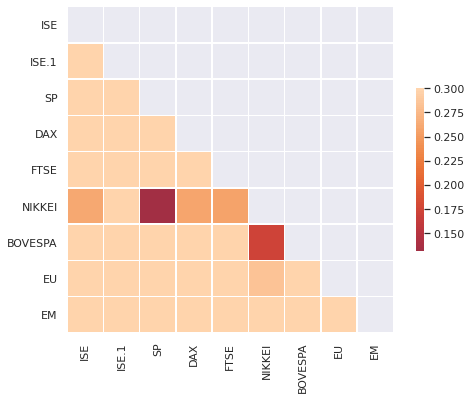

In [ ]:
sns.set_theme(style='darkgrid')

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Trying out with univariate sequence for forecast using CNN

In [ ]:
df = data.drop(['ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], axis=1)

In [ ]:
df.head()

,ISE.1
date,
2009-01-05,0.038376
2009-01-06,0.031813
2009-01-07,-0.026353
2009-01-08,-0.084716
2009-01-09,0.009658


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
n_steps = 3
X, y = split_sequence(df.values, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X[0]

array([[ 0.03837619],
       [ 0.03181274],
       [-0.02635297]])

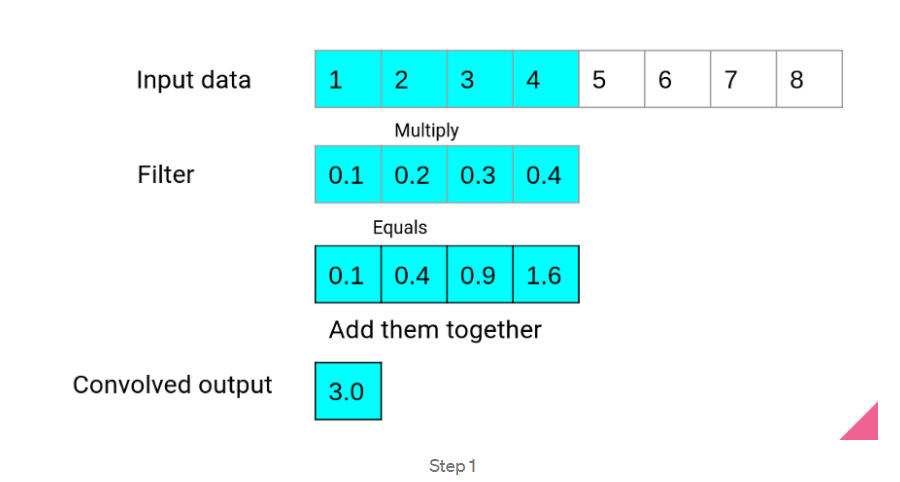

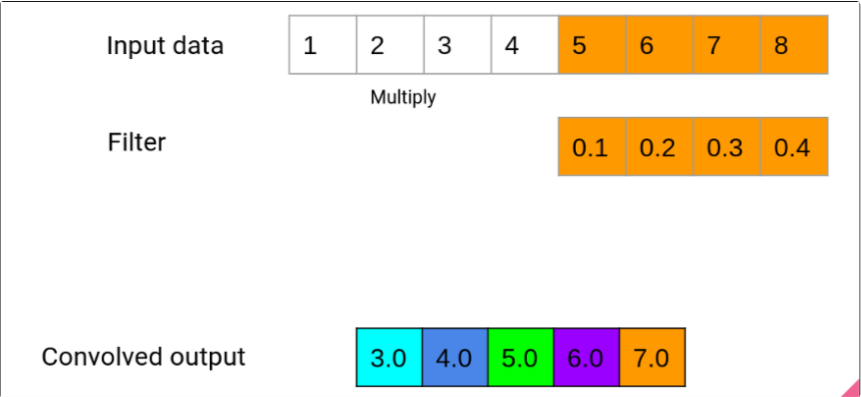

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data.shape, df.shape

((536, 9), (536, 1))

In [ ]:
X_train.shape, y_train.shape

((426, 3, 1), (426, 1))

In [ ]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# import tensorflow as tf
# from tf.keras.layers import Dense

# input_shape=(n_steps, n_features)
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=2, padding = 'same', activation='relu'))
# model.add(MaxPooling1D(pool_size=(3)))
# model.add(Flatten())
# model.add(Dense(64, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(2))
# model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=120)

Epoch 1/120
14/14 [==============================] - 0s 8ms/step - loss: 3.4844e-04 - val_loss: 5.5550e-04
Epoch 2/120
14/14 [==============================] - 0s 4ms/step - loss: 3.5447e-04 - val_loss: 5.5383e-04
Epoch 3/120
14/14 [==============================] - 0s 4ms/step - loss: 3.4930e-04 - val_loss: 5.4485e-04
Epoch 4/120
14/14 [==============================] - 0s 4ms/step - loss: 3.5095e-04 - val_loss: 5.5243e-04
Epoch 5/120
14/14 [==============================] - 0s 6ms/step - loss: 3.4630e-04 - val_loss: 5.6455e-04
Epoch 6/120
14/14 [==============================] - 0s 5ms/step - loss: 3.4703e-04 - val_loss: 5.4362e-04
Epoch 7/120
14/14 [==============================] - 0s 4ms/step - loss: 3.4698e-04 - val_loss: 5.4328e-04
Epoch 8/120
14/14 [==============================] - 0s 5ms/step - loss: 3.4764e-04 - val_loss: 5.5890e-04
Epoch 9/120
14/14 [==============================] - 0s 4ms/step - loss: 3.5040e-04 - val_loss: 5.5234e-04
Epoch 10/120
14/14 [=================

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 5.8296e-04


0.0005829608417116106

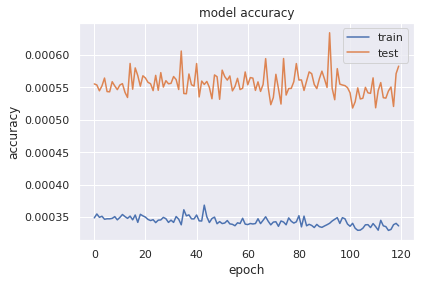

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

For 300 epochs it's overfitting the model so, We can stop the training at 100. It might be appropriate for optimum fitting 

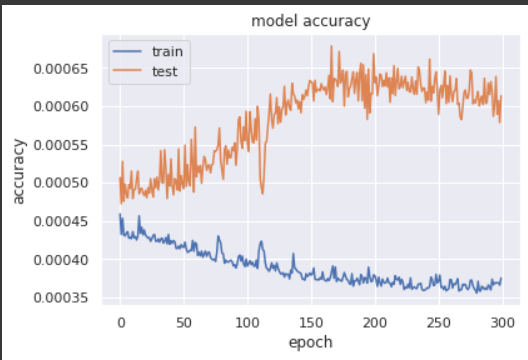

In [ ]:
input = df.iloc[:3].values
input = input.reshape((1, n_steps, n_features))
pred = model.predict(input)
pred, df.iloc[3]

(array([[-0.00112597]], dtype=float32), ISE.1   -0.084716
 Name: 2009-01-08 00:00:00, dtype: float64)

#### Trying with multi-variate sequence forecasting using CNN

In [ ]:
data.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the dataset
    if end_ix > len(sequences)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix-1, :]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)


In [ ]:
n_steps = 9
X, y = split_sequences(data.values, n_steps)
n_features = X.shape[2]
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape[0], X.shape[1], X.shape[2]

(527, 9, 9)

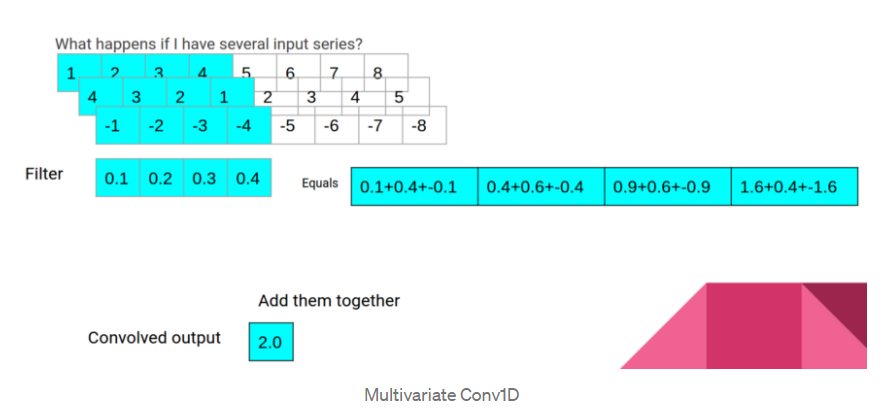

Here the sequence is dividing into 9 rows and 9 columns square which can be replicated as image matrix. So that it can be convoluted across the whole part and predict next row stocks for all countries

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, Y_train.shape, x_train[0], Y_train[0]

((368, 9, 9),
 (368, 9),
 array([[ 0.00417148, -0.00558177,  0.00100862,  0.00334633,  0.        ,
          0.00503074,  0.01330015,  0.00192326,  0.00786147],
        [ 0.00153465,  0.0084385 , -0.00150934, -0.01168698, -0.00424487,
         -0.01123984,  0.00510644, -0.00919071,  0.00331358],
        [-0.01231184, -0.0068611 , -0.00019081,  0.        , -0.01197902,
          0.0164041 ,  0.00943518, -0.00615786,  0.00278939],
        [ 0.02400222,  0.01751547,  0.01125131,  0.01086754,  0.01913806,
          0.        ,  0.        ,  0.00963293,  0.00816767],
        [ 0.0090402 ,  0.01104759, -0.00131389, -0.00206085,  0.        ,
          0.        ,  0.00507557,  0.00657653,  0.00423876],
        [ 0.00885954,  0.01178021,  0.00499459, -0.00510667,  0.00497604,
         -0.00166804,  0.01093293, -0.00054829, -0.00118012],
        [ 0.00698236,  0.00685022, -0.00212515,  0.0059722 , -0.0040453 ,
          0.01425048, -0.0072281 , -0.00062024, -0.00264603],
        [-0.00783512, -

In [ ]:
# define model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [ ]:
hist = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=150)

Epoch 1/150
12/12 [==============================] - 0s 11ms/step - loss: 2.0605e-05 - val_loss: 1.3007e-04
Epoch 2/150
12/12 [==============================] - 0s 8ms/step - loss: 1.9524e-05 - val_loss: 1.2978e-04
Epoch 3/150
12/12 [==============================] - 0s 7ms/step - loss: 1.8742e-05 - val_loss: 1.3026e-04
Epoch 4/150
12/12 [==============================] - 0s 7ms/step - loss: 2.0036e-05 - val_loss: 1.2965e-04
Epoch 5/150
12/12 [==============================] - 0s 7ms/step - loss: 1.9930e-05 - val_loss: 1.2792e-04
Epoch 6/150
12/12 [==============================] - 0s 8ms/step - loss: 1.9732e-05 - val_loss: 1.2922e-04
Epoch 7/150
12/12 [==============================] - 0s 7ms/step - loss: 2.0948e-05 - val_loss: 1.3263e-04
Epoch 8/150
12/12 [==============================] - 0s 8ms/step - loss: 2.2099e-05 - val_loss: 1.3106e-04
Epoch 9/150
12/12 [==============================] - 0s 7ms/step - loss: 2.2671e-05 - val_loss: 1.3231e-04
Epoch 10/150
12/12 [================

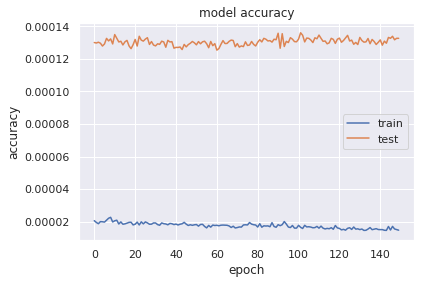

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Here as well, as the number of epochs increse the data isn getting overfit. So, we're gonna settle down with 100 epoch or can add more layer to the Sequential model. 

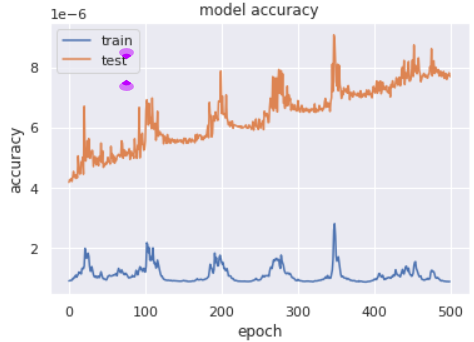

In [ ]:
input = data.iloc[526:535,:].values
input = input.reshape((1, n_steps, n_features))
pred = model.predict(input)
pred

array([[ 0.00824929,  0.00984178,  0.00041366,  0.00163348,  0.00093226,
         0.00353226, -0.00013305,  0.00109444,  0.00265787]],
      dtype=float32)

 This is the next day prediction of the stock of all countries. As the input table is in normalized form so as the forecast values.

#### trying out with conv2D


In [ ]:
n_steps = 9
X, y = split_sequences(data.values, n_steps)
n_features = X.shape[2]
X = X.reshape((X.shape[0], X.shape[1], n_features, 1))
X.shape[0], X.shape[1], X.shape[2], X.shape[3]

(527, 9, 9, 1)

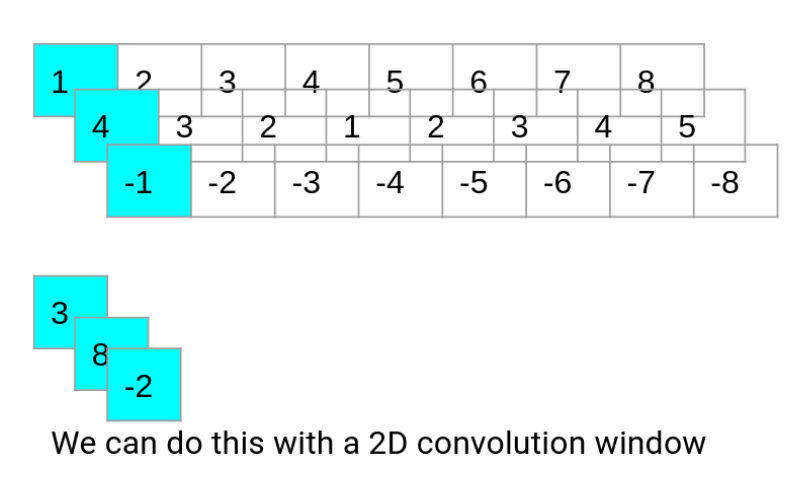

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# define model
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=1)) 
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [ ]:
hist = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=50)

Epoch 1/50
12/12 [==============================] - 1s 28ms/step - loss: 0.0010 - val_loss: 5.3695e-04
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 4.1804e-04 - val_loss: 2.2187e-04
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 1.5138e-04 - val_loss: 1.3837e-04
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 1.0738e-04 - val_loss: 1.4221e-04
Epoch 5/50
12/12 [==============================] - 0s 14ms/step - loss: 9.8959e-05 - val_loss: 1.4194e-04
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 1.1603e-04 - val_loss: 1.4201e-04
Epoch 7/50
12/12 [==============================] - 0s 15ms/step - loss: 1.0035e-04 - val_loss: 1.4196e-04
Epoch 8/50
12/12 [==============================] - 0s 15ms/step - loss: 1.0663e-04 - val_loss: 1.4193e-04
Epoch 9/50
12/12 [==============================] - 0s 14ms/step - loss: 9.7691e-05 - val_loss: 1.4194e-04
Epoch 10/50
12/12 [======================

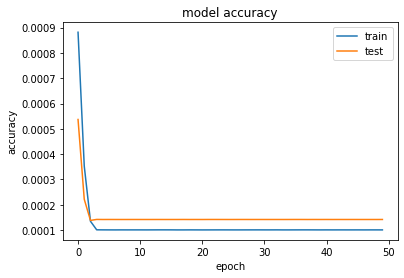

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()